# Week-4. Matplotlibによる描画（２）

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cwdのパスは環境によって書き換える。
%cd /content/drive/MyDrive/100本ノックチャレンジ/06_Visualization_100_knocks/01_Quesions
%ls -lha

/content/drive/MyDrive/100本ノックチャレンジ/06_Visualization_100_knocks/01_Quesions
total 833K
drwx------ 2 root root 4.0K Sep  7 04:46 data/
-rw------- 1 root root 154K Sep 10 07:41 Week01_question_colab.ipynb
-rw------- 1 root root 137K Sep 10 07:40 Week02_question_colab.ipynb
-rw------- 1 root root 209K Sep 10 07:40 Week03_question_colab.ipynb
-rw------- 1 root root 330K Sep 11 02:44 Week04_question_colab.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# jupyter内に描画

In [4]:
# Irisのデータセット
# CSVファイルの読み込み
df = pd.read_csv("./data/iris.csv") # df = dataframe の略
df.head()

,a1,a2,a3,a4,id,label
0,5.1,3.5,1.4,0.2,id_1,Iris-setosa
1,4.9,3.0,1.4,0.2,id_2,Iris-setosa
2,4.7,3.2,1.3,0.2,id_3,Iris-setosa
3,4.6,3.1,1.5,0.2,id_4,Iris-setosa
4,5.0,3.6,1.4,0.2,id_5,Iris-setosa


## Q16. Irisのデータで、以下の様にデフォルト設定のバイオリンプロットを描画しなさい。

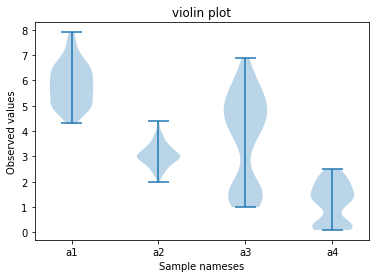

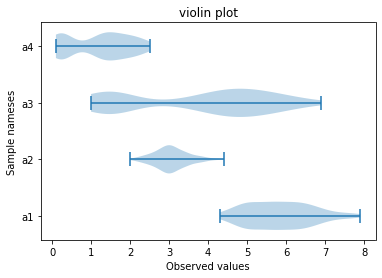

In [5]:
# コード欄

## Q17. Irisのデータで、以下の様にカスタマイズしたバイオリンプロットを描画しなさい。

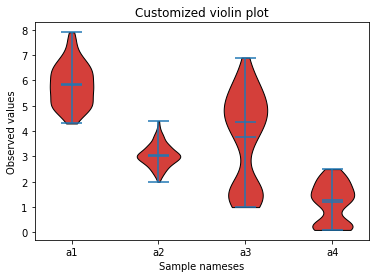

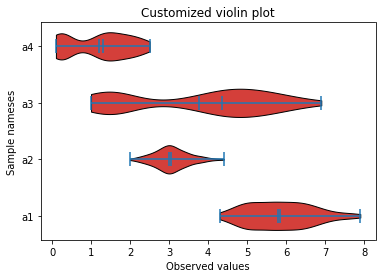

In [6]:
# コード欄

## Q18. 以下のように三角関数を描画する関数を作成して、Sin, Cos, Tan 曲線を描きなさい。

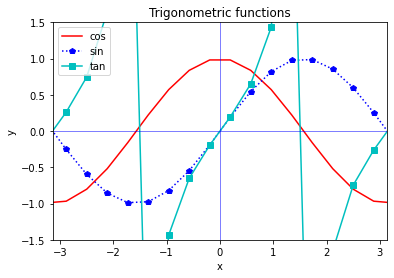

In [7]:
# コード欄

## Q19. ディープラーニングの学習曲線を描く関数を作成し描画しなさい。

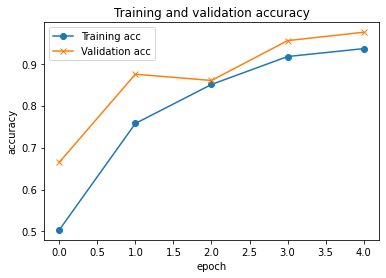

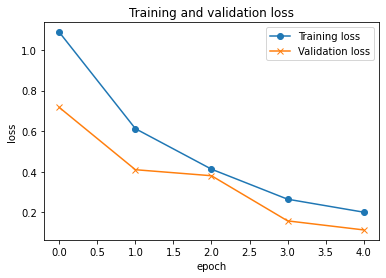

In [8]:
# Tensorflow/Keras の historyクラスを定義
class history:
    def __init__(acc, val_acc, loss, val_loss):
        self.acc = acc
        self.val_acc = val_acc
        self.loss = loss
        self.val_loss = val_loss

# historyクラスにメンバーを入力
his = history
his.acc = [0.50376884, 0.75753769, 0.85050251, 0.91708543, 0.93592965]
his.val_acc = [0.665, 0.875, 0.86, 0.955, 0.975]
his.loss = [1.0869408207922127, 0.612384136298194, 0.4129973124319585, 0.2651988666261261, 0.20133653537711904]
his.val_loss = [0.7168122148513794, 0.4103385591506958, 0.3806729394197464, 0.15852605164051056, 0.11399855181574821]

In [9]:
# コード欄

## Q20. ガウス混合もでるによるクラスタリングの結果を以下のように散布図と確率密分布を表示しなさい。

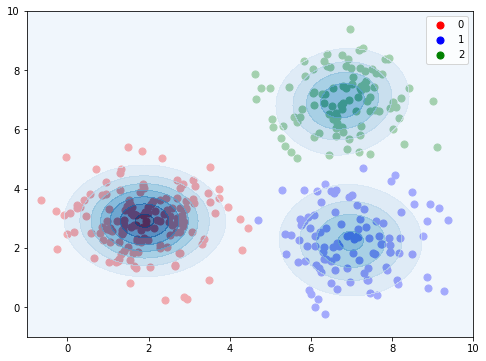

In [10]:
%%time
# 時間がかかります。
!pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp37-cp37m-linux_x86_64.whl size=15066262 sha256=7207c8ccfe7ddd1ac99f852d893cce0001173d28ea82e70474366cb28a72dc75
  Stored in directory: /root/.cache/pip/wheels/24/68/69/0eaab474ef1d65abedcd47de8a38ab21d221d329954d7edd24
Successfully built pomegranate
CPU times: user 2.17 s, sys: 396 ms, total: 2.56 s
Wall time: 4min 20s


In [11]:
# Pomegranateによる混合ガウスモデルの実装
# https://github.com/jmschrei/pomegranate/tree/master/tutorials

from pomegranate import *
np.random.seed(0)

# ３つのクラスターを想定した模擬データの作成
X = np.concatenate([np.random.normal((7, 2), 1, size=(100, 2)),
                       np.random.normal((2, 3), 1, size=(150, 2)),
                       np.random.normal((7, 7), 1, size=(100, 2))])

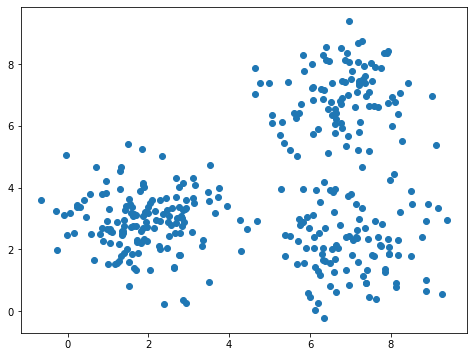

In [12]:
# データの可視化
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [13]:
# グリッドの作成
x = np.arange(-1, 10.1, .1)
y = np.arange(-1, 10.1, .1)

xx, yy = np.meshgrid(x, y)
x_ = np.array(list(zip(xx.flatten(), yy.flatten())))

# ３成分の混合ガウスモデル作成
n_components = 3
model = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_components, X)

# 確率分
p = model.probability(x_).reshape(len(x), len(y))
p

array([[1.89896302e-07, 2.53960313e-07, 3.36226664e-07, ...,
        1.54937466e-05, 1.19216707e-05, 9.08799293e-06],
       [2.92502415e-07, 3.91151959e-07, 5.17819638e-07, ...,
        2.01033921e-05, 1.54660861e-05, 1.17880425e-05],
       [4.45561702e-07, 5.95786442e-07, 7.88660937e-07, ...,
        2.58682125e-05, 1.98979305e-05, 1.51635046e-05],
       ...,
       [4.04277311e-15, 5.36211556e-15, 7.04064823e-15, ...,
        9.85281780e-06, 7.09289121e-06, 5.04662344e-06],
       [1.87138139e-15, 2.48191703e-15, 3.25861628e-15, ...,
        7.60507624e-06, 5.48075013e-06, 3.90383262e-06],
       [8.56665837e-16, 1.13607045e-15, 1.49149596e-15, ...,
        5.81107296e-06, 4.19243505e-06, 2.98944875e-06]])

In [14]:
# クラスタリング
pred = model.predict(X)

# プロット用のデータフレーム作成
df_pome = pd.DataFrame(X, columns = ["x", "y"])
df_pome["cluster"] = pred
df_pome.head()

,x,y,cluster
0,8.764052,2.400157,1
1,7.978738,4.240893,1
2,8.867558,1.022722,1
3,7.950088,1.848643,1
4,6.896781,2.410599,1


In [15]:
# コード欄

## おまけ：Matplotlibの軸周りサマリーチャート

https://www.yutaka-note.com/entry/matplotlib_axis

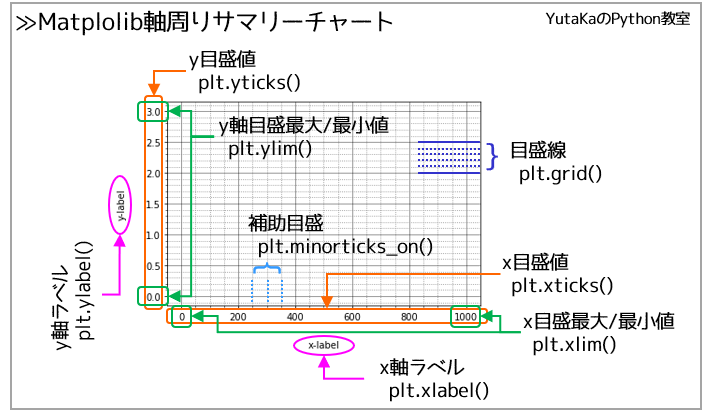